### Predicting whether a Customer will stop using a service

Importing our libraries

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
df = pd.read_csv('data/telecom_customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Filling out null values

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce' )

#filling the null values in a numerical column with the corresponding column median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

### Plotting some relevant fields

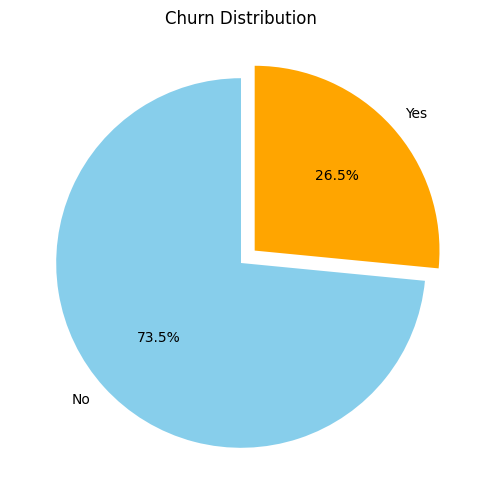

In [5]:
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90, explode=[0, 0.1])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

Plotting churn rates by months with telecom company -- churn rates are certainly higher the shorter the customer has been with the company

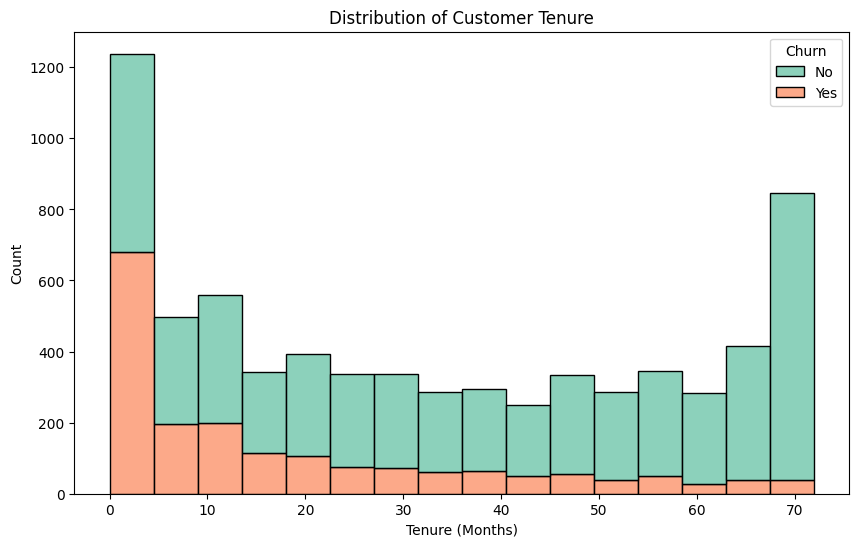

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette='Set2')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

Due to the non-commitment that a month-to-month plan has, it is much more likely for customers with those types of plans to churn.

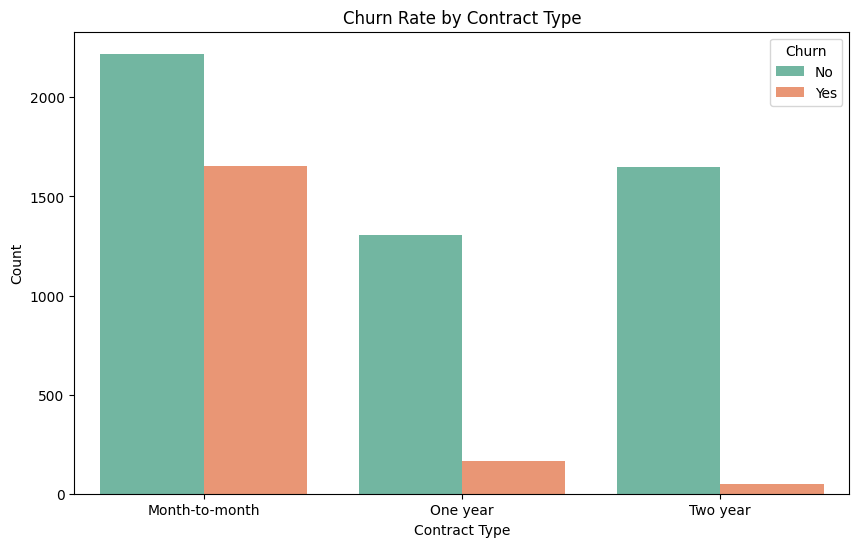

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

C:\Users\goober\AppData\Local\Temp2\ipykernel_37856\3866487793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


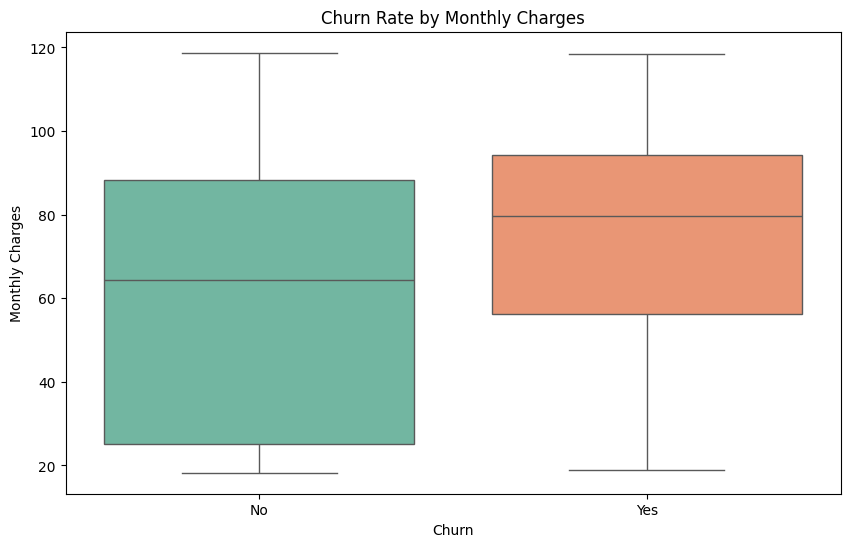

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Creating labels for categorical data, including the target column

In [10]:
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [11]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

### Setting our feature columns and our target column

In [12]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

### Initial Training and Testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
xgb_model = XGBClassifier(n_estimators = 300, learning_rate = 0.025, max_depth = 7)

In [15]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
y_pred = xgb_model.predict(X_test)

### Printing out metrics for our model

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")

[[924 111]
 [170 204]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC Score: 0.7191040843214755


### Hyperparameter Tuning with GridSearchCV

With some hyperparameter tuning, the ROC AUC Score is around 0.72, we can use gridsearch to find the best possible hyperparameters

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5, 1],
    'scale_pos_weight': [1, 2, 5]  # Based on class imbalance ratio
}

In [20]:
xgb_model = XGBClassifier(random_state=42, objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

In [21]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

In [22]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


C:\Users\goober\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'gamma': [0, 0.1, 0.5, 1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 300],
                         'scale_pos_weight': [1, 2, 5], 'subsample': [0.8]},
             scoring='roc_auc', verbose=1)

In [23]:
print("Best Parameters: ", grid_search.best_params_)
print("Best ROC AUC Score: ", grid_search.best_score_)

Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}
Best ROC AUC Score:  0.8486438838131359


We can create a model that has an ROC AUC Score of 0.85, which is much better than what we started with. We can tune the hyperparameters even more, but at the cost of time